<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 퍼셉트론

* 퍼셉트론은 신경망의 기원이 되는 알고리즘이다.
* 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력한다.


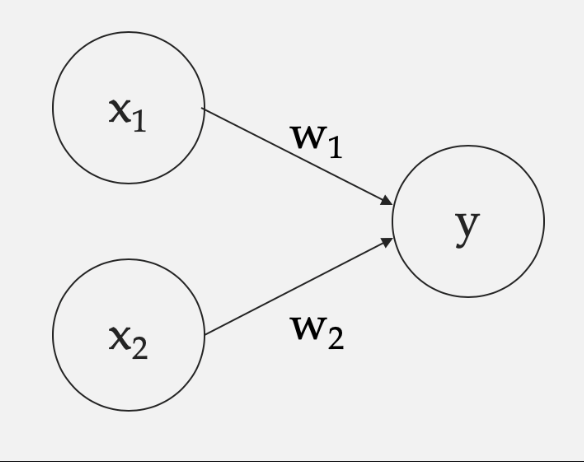

* 위 그림은 입력으로 2개의 신호를 받는 퍼셉트론의 예이다.
* x1, x2는 입력 신호, y는 출력 신호, w1, w2는 가중치이다.
* 그림의 원을 뉴런 혹은 노드라고 부른다.
* 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력한다.(뉴런 활성화)

* 한계값을 임계값이라고 하고, 세타로 표현


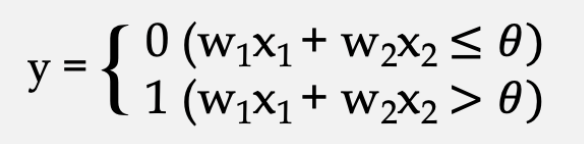

* 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치 부여
* 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용 (신호가 클수록 그만큼 중요하다는 것)


In [ ]:
# 가중치는 전류에서 말하는 저항에 해당한다. 서로 작용하느 방향은 반대지만, 신호가 얼마나 잘 흐르는 가를 통제한다는 점에서 저항과 가중치는 같은 기능을 한다.

AND 게이트


* AND 게이트는 입력이 둘이고, 출력은 하나
* AND 게이트는 두 입력이 모두 1일 때만, 1을 출력하고 그 외에는 0을 출력

 NAND 게이트와 OR 게이트


* NAND 게이트는 Not AND를 의미하고, AND 게이트의 출력을 뒤집은 것
* OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 것


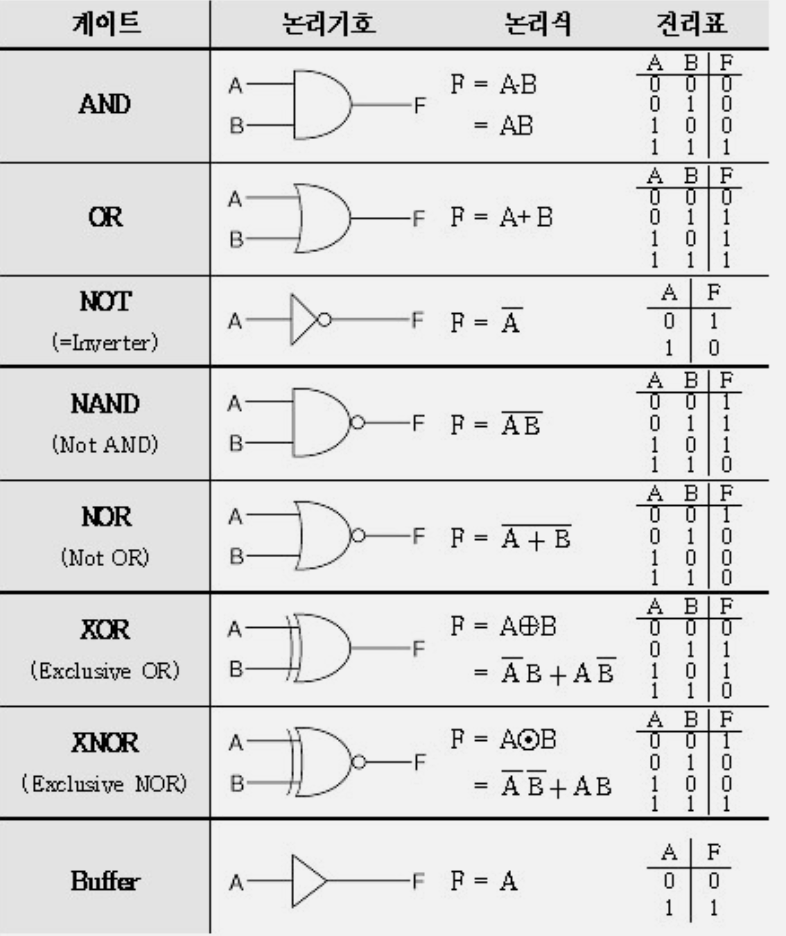

In [ ]:
# 학습이란 적절한 매개변수 값을 정하는 작업이며, 사람은 퍼셉트론 구조를 고민하고 컴퓨터에 학습할 데이터를 주는 일을 한다.
# w1, w2, 세타를 정하는 과정 -> 매개변수 = 가중치와 임계값
# and, nand, or로 매개변수 값만 적절히 조정하여 변한다.

# 2.1 퍼셉트론 구현

In [4]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1 * w1 + x2 * w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

In [6]:
AND(0,0)
AND(1,0)
AND(0,1)
AND(1,1)

1

가중치와 편향 도입

 * 기존에 퍼셉트론 동작 원리의 식에서
를 로 치환하면 다음의 식 확인 가능
* b 를 편향 (bias)이라 하고, w1, w2는 그대로 가중치
퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 더해서, 출력값을 결정

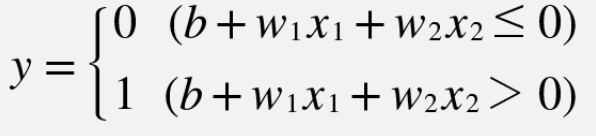

* w1, w2는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수고,
* 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수이다.


In [9]:
import numpy as np

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [12]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [13]:
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5]) # AND와는 가중치 w와 b만 다르다.
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [14]:
print(NAND(0,0))
print(NAND(1,0))
print(NAND(0,1))
print(NAND(1,1))

1
1
1
0


In [17]:
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [18]:
print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


# 2.2 퍼셉트론의 한계

도전! XOR 게이트


* XOR 게이트는 배타적 논리합이라는 논리 회로
* x1, x2 중에서 하나가 1일 때만 1을 출력

선형과 비선형


* 선형식 (직선)으로 XOR 게이트를 표현하는 것은 사실상 불가
* 하지만 비선형 (곡선)으로는 다음과 같이 표현 가능
* 즉, 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있음

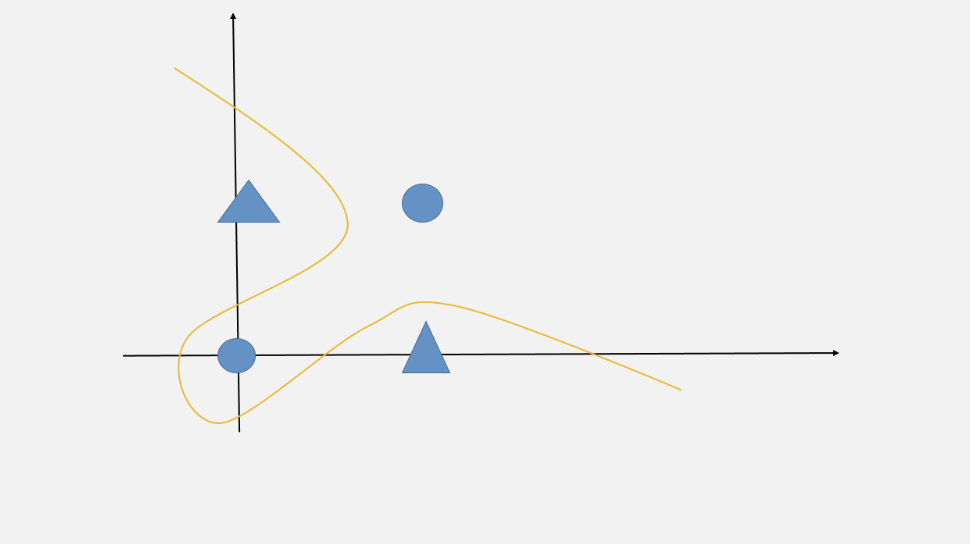

다층 퍼셉트론이 출동한다면


* 단일 퍼셉트론으로는 XOR 게이트를 구현할 수 없었음
* 하지만 층을 쌓아서 올리는 다층 퍼셉트론 (Multi-layer perceptron)으로는 구현 가능

기존 게이트 조합하기

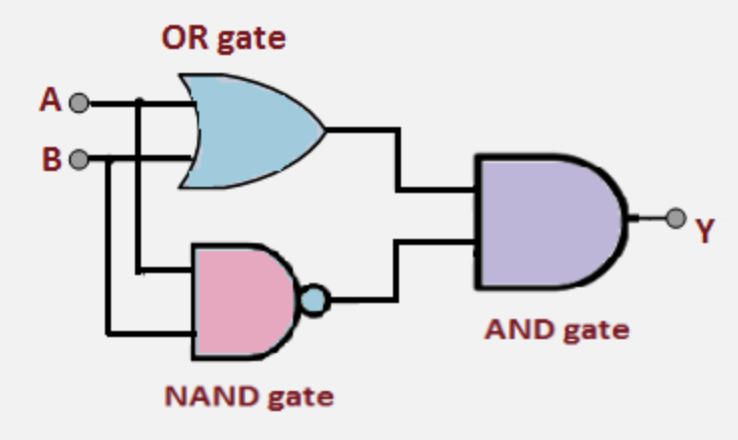

* x1과 x2가 입력 신호, y가 출력 신호다.
* x1과 x2는 NAND와 OR 게이트의 입력이 되고, NAND와 OR의 출력이 AND 게이트의 입력으로 이어진다.

XOR 게이트 구현하기


In [19]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [20]:
print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


* XOR 다층 구조의 네트워크이다.
* 이처럼 층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라 한다.

  - 0층의 두 뉴런이 입력 신호를 받아서 1층의 뉴런으로 신호를 보냄
  - 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력

* 단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 더 늘려서 구현

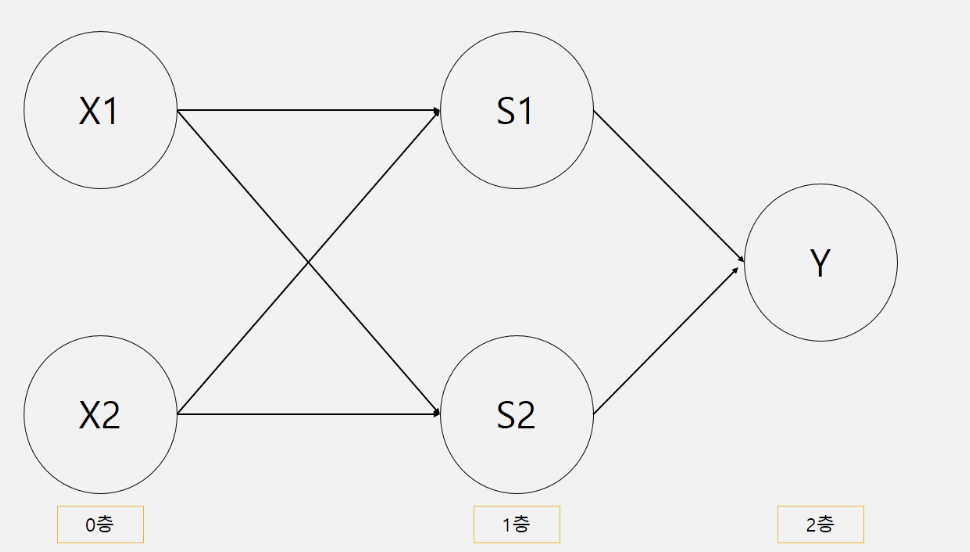

정리

* 퍼셉트론은 입출력을 갖춘 알고리즘
* 퍼셉트론은 입력을 주면, 정해진 규칙에 따른 값을 출력
* 퍼셉트론은 가중치와 편향을 매개변수로 설정
* 퍼셉트론으로 AND, OR 같은 논리회로 표현 가능
* XOR 게이트는 단층 퍼셉트론 (직선)은 불가능하지만,
* 다층 퍼셉트론 (곡선)으로 구현 가능